In [180]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
df = pd.read_csv(r'D:\Upgrad - PG diploma - datascience\Course 2_ML-I\Lead Score case study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [182]:
# shape of data frame
df.shape

(9240, 37)

In [183]:
# statistical view of data frame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [184]:
# basic information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# HANDLING DATA QUALITY ISSUES

### handling duplicates


In [185]:
print('shape of data frame before dropping duplicates:',end = '')
print(df.shape)
df = df.drop_duplicates()
print('shape of data frame after dropping duplicates:',end = '')
print(df.shape)

shape of data frame before dropping duplicates:(9240, 37)
shape of data frame after dropping duplicates:(9240, 37)


Insight : 
There are no duplicates

### handling null values

In [186]:
# Replacing the value 'Select' with null in data frame as 'Select' signifies that the person who filled the form did not select anything
df = df.replace('Select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [187]:
# Checking null values percentage in each column
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [188]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [189]:
# Removing columns with null values percentage greater than 45 percent except lead quality
# Even though the lead quality is above 45 no need to drop it , reason will be told later
nulls_greater_than_45_except_lead_quality = ['Lead Profile','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
df.drop(nulls_greater_than_45_except_lead_quality,axis = 1,inplace = True)

#checking null values percentages again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [190]:
# handling lead quality column
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [191]:
'''The reason for not dropping lead quality is lead quality is an important metric based on business objective.Lead quality is
just employee's intuition about lead ,therefore since if nothing is written in lead quality of some customers, we can 
just impute those with not sure
'''
df['Lead Quality'] = df['Lead Quality'].replace(np.nan,'Not Sure')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [192]:
# handling City column
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [193]:
# Since City is categorical it is better to impute missing values with mode which is Mumbai
df['City'] = df['City'].replace(np.nan,'Mumbai')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [194]:
# handling specialization
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [195]:
# Null values might represent that some of the customers might be student and did not have a specialization or some might did not have any specialization
# therefore to cover above two scenarios and other scenarios let us create another category in specialization 'Others'
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [196]:
# handling Tags column
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [197]:
# Since Tags column is categorical it is better to impute missing values with mode which is Will revert after reading the email
df['Tags'] = df['Tags'].replace(np.nan,'Will revert after reading the email')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [198]:
# handling What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [199]:
# Since What matters most to you in choosing a course column is categorical it is better to impute missing values with mode which is Better Career Prospects
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [200]:
# handling What is your current occupation
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [201]:
# Since What is your current occupation column is categorical it is better to impute missing values with mode which is Unemployed
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Unemployed')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [202]:
# handling Country
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Ghana                      2
China                      2
Uganda                     2
Belgium                    2
Bangladesh                 2
Philippines                2
Italy                      2
Sri Lanka                  1
Russia                     1
Kenya                      1
Switzerland                1
Vietnam                    1
Indonesia                  1
Malaysia      

In [203]:
# Since Country column is categorical it is better to impute missing values with mode which is India
df['Country'] = df['Country'].replace(np.nan,'India')

#checking null values again
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

Rest of the missing values are less than 2 percent, since we have very large data of about 9000 records let us drop the rows containing missing values because dropping these rows will not affect our analysis

In [204]:
df.dropna(inplace = True)

In [205]:
round(((df.isnull().sum())/(df.shape[0]))*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [206]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Checking Prospect ID,Lead Number whether they have unique values 

In [207]:
# since both columns represent IDs it is necessary that these both columns should have unique values
print(df['Prospect ID'].is_unique)
print(df['Lead Number'].is_unique)

True
True


### Checking for target class imbalance

In [208]:
df['Converted'].value_counts()/df.shape[0]

0    0.621446
1    0.378554
Name: Converted, dtype: float64

class 0 has approximately 62 percent data points and class 1 has approximately 38 percent data points which is good enough . There is not much of a class imbalance that we need to worry about , distribution is fine and  we can go ahead with next step 

### other cleaning steps

In [209]:
# dropping both Prospect ID,Lead Number columns ,since they r ids we donot need them for our analysis
Prospect_ID = df['Prospect ID']
Lead_Number = df['Lead Number']
df.drop(['Prospect ID','Lead Number'],inplace = True,axis = 1)

In [210]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
testone                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [211]:
# We can see some google category is written twice as 'Google','google' therefore let us convert both into single format 
# also combining all categories whose value counts are very less into others category for ease of analysis
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(['Social Media', 'WeLearn', 'bing', 
                                'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                    'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [212]:
df['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [213]:
# combining less value counts categories into single category
df['Last Activity'] = df['Last Activity'].replace([ 'Approached upfront',
                           'Resubscribed to emails','Had a Phone Conversation', 'View in browser link Clicked', 
                            'Visited Booth in Tradeshow','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [214]:
df['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [215]:
# combining less value counts categories into single category
df['Tags'] = df['Tags'].replace(['Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)',
                                     'Diploma holder (Not Eligible)','In confusion whether part time or DLP', 'in touch with EINS',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                   'Want to take admission but has financial problems', 'Lost to Others','Shall take in the next coming month',
                                    'University not recognized'], 'Others')

### dropping unnecessary columns

In [216]:
# checking value counts of all columns
for i in df.columns:
    print(df[i].value_counts())

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64
No     8358
Yes     716
Name: Do Not Email, dtype: int64
No     9072
Yes       2
Name: Do Not Call, dtype: int64
0    5639
1    3435
Name: Converted, dtype: int64
0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2


In [217]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [218]:
# unnecessary columns are those columns in which there is not much variability in it to help our analysis
unnecessary_columns = ['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque']
df.drop(unnecessary_columns,inplace = True,axis = 1)

In [219]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# PERFORMING EXPLORATORY DATA ANALYSIS(EDA)

### Univariate analysis of numeric columns

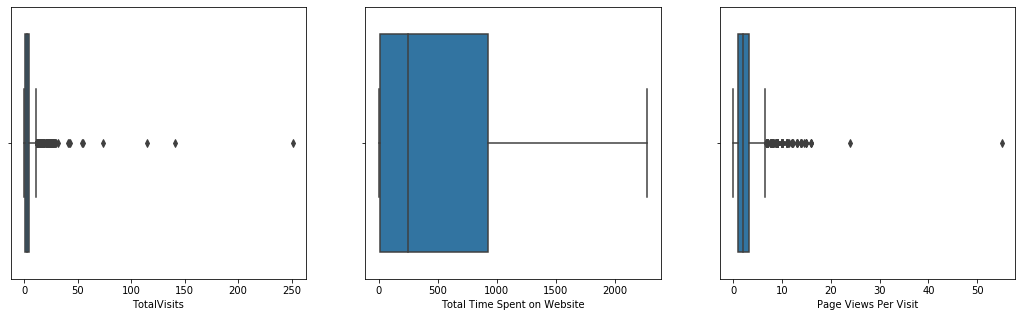

In [220]:
# Univariate analysis of numeric columns
numeric_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# univariate analysis
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(df.TotalVisits)
plt.subplot(1, 3, 2)
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(1, 3, 3)
sns.boxplot(df['Page Views Per Visit'])

Insights :  
- Most of the total times spent on website are in between range 250 and 2000
- There are some outliers in Total Visits and page views per visit which will be handled later

### Bivariate analysis of numeric columns

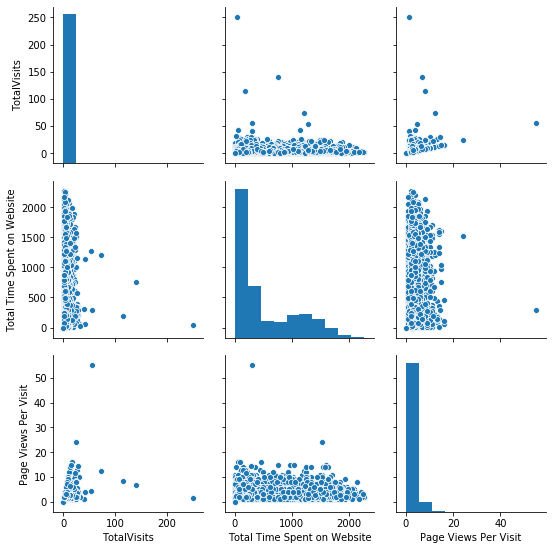

In [221]:
# bivariate analysis of numeric columns
sns.pairplot(df[numeric_columns])

Insights:
- Most of the total visits are in the range between 0 and 100
- Most of the page views per visit are in the range between 0 and 20

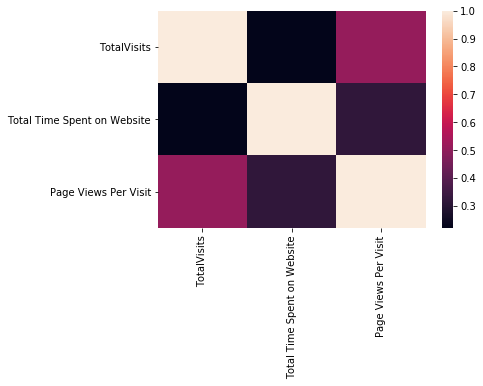

In [222]:
# checking correlation between numeric columns
sns.heatmap(df[numeric_columns].corr())

Insights:
- There is a slight correlation between Totalvisits and page views per visit
- There is a weak correlation between Total time spent on website and total visits

### Segmented univariate analysis of numeric columns

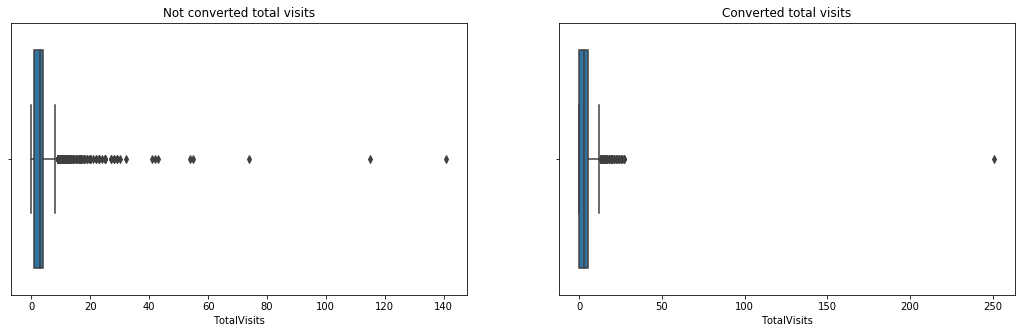

In [223]:
# total visits Vs Converted
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Not converted total visits')
sns.boxplot(df[df['Converted']==0].TotalVisits)
plt.subplot(1, 2, 2)
plt.title('Converted total visits')
sns.boxplot(df[df['Converted']==1].TotalVisits)

Insights:
- There are outliers in both total visits of Not converted and converted people

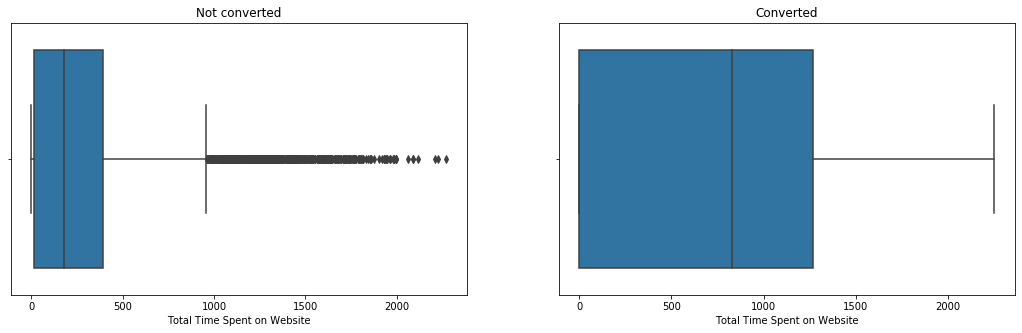

In [224]:
# Total Time Spent on Website Vs Converted
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Not converted')
sns.boxplot(df[df['Converted']==0]['Total Time Spent on Website'])
plt.subplot(1, 2, 2)
plt.title('Converted')
sns.boxplot(df[df['Converted']==1]['Total Time Spent on Website'])

Insights:
- Most of the total times spent on website in converted people are in between 0 and 750
- total time spent Median of not converted is less than total time spent median of converted.
- There are outliers in total time spent on website for not converted people

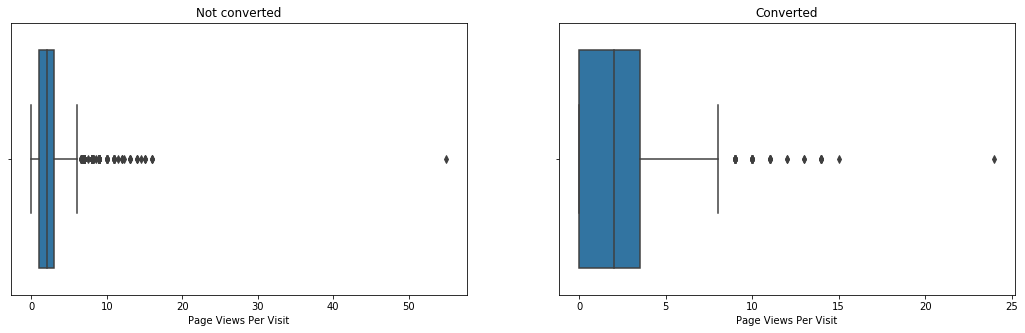

In [225]:
# Page Views Per Visit Vs Converted
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.title('Not converted')
sns.boxplot(df[df['Converted']==0]['Page Views Per Visit'])
plt.subplot(1, 2, 2)
plt.title('Converted')
sns.boxplot(df[df['Converted']==1]['Page Views Per Visit'])

Insights:
- Most of the Page views per visit in converted are in range between 0 and 2.
- There are outliers in both converted and not converted people in terms of page views per visit

In [226]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### univariate analysis of categorical variables

(array([0, 1]), <a list of 2 Text xticklabel objects>)

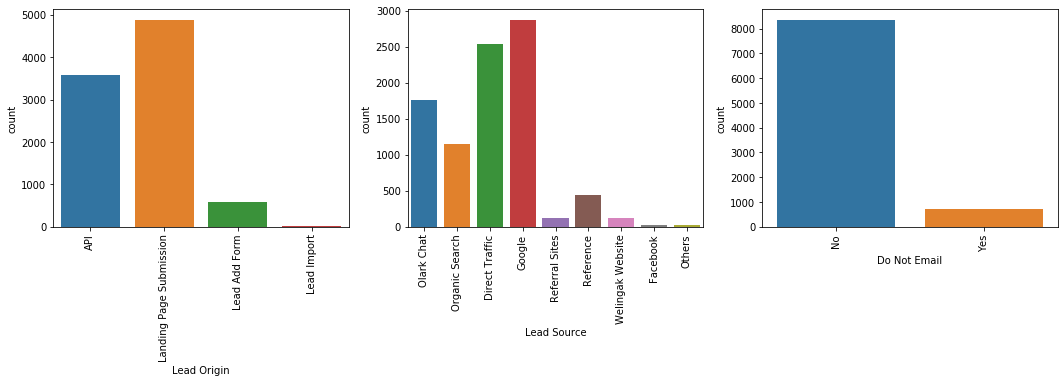

In [227]:
# univariate analysis of 'Lead Origin', 'Lead Source', 'Do Not Email'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='Lead Origin', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Lead Source', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Do Not Email', data = df)
plt.xticks(rotation = 90)


Insights:
- Most of the lead origins are from landing page submission and least lead origins are from lead import
- Most of the lead sources are from Google,direct traffic
- In Do Not Email,No has major count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

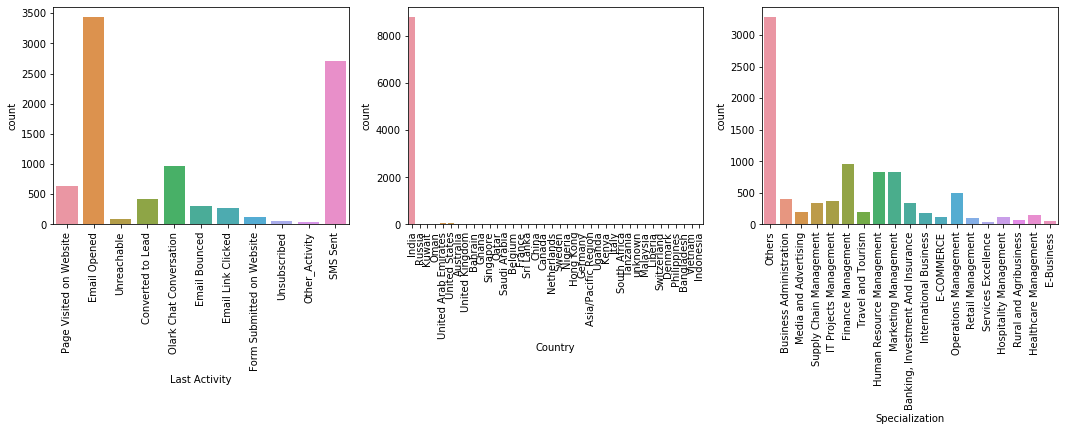

In [228]:
# univariate analysis of 'Last Activity', 'Country', 'Specialization'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='Last Activity', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Country', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Specialization', data = df)
plt.xticks(rotation = 90)

Insights:
- Among last activities did by customers, Email opening tops the list,next comes SMS sent category
- Most of the customers are from india
- Some of the specializations which have most customers are finance management,human resource management,others

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

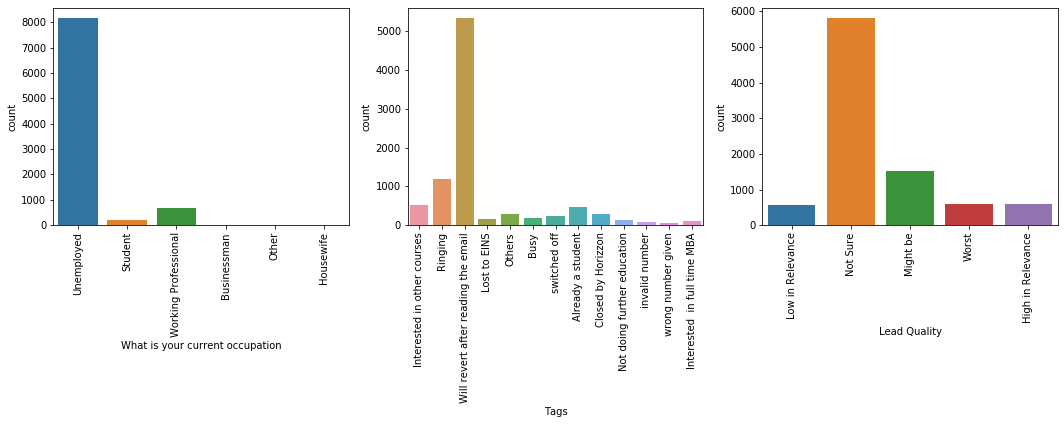

In [229]:
# univariate analysis of 'What is your current occupation', 'Tags', 'Lead Quality'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='What is your current occupation', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Tags', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Lead Quality', data = df)
plt.xticks(rotation = 90)


Insights:
- Most of the customers current occupation is unemployed
- Most of the customers are tagged 'Will revert after reading the email'
- Most of the lead quality from the data we got belongs to not sure category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

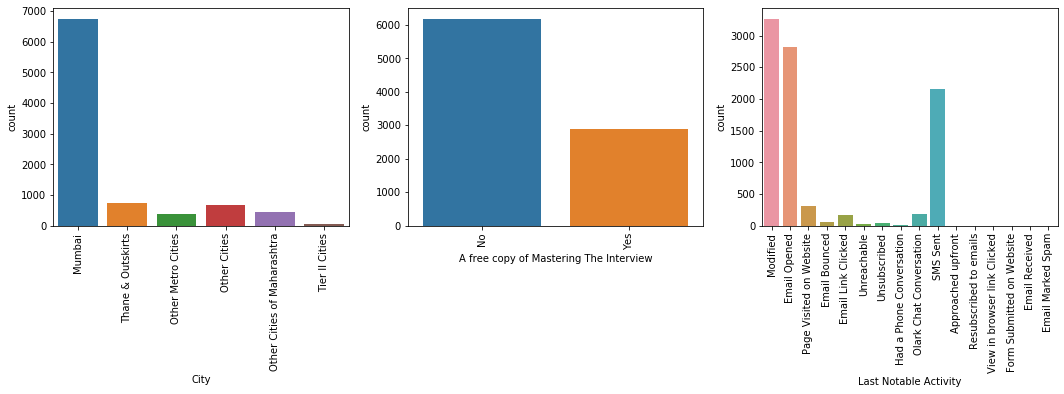

In [230]:
# univariate analysis of 'City','A free copy of Mastering The Interview', 'Last Notable Activity'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='City', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='A free copy of Mastering The Interview', data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Last Notable Activity', data = df)
plt.xticks(rotation = 90)


Insights:
- Most of the customers dont want a free copy of mastering the interview
- Modified is the category which tops in last notable activity,next comes up Email opened and SMS sent category
- most of the customers live in mumbai

### segemented univariate anlaysis for categorical variables

(array([0, 1]), <a list of 2 Text xticklabel objects>)

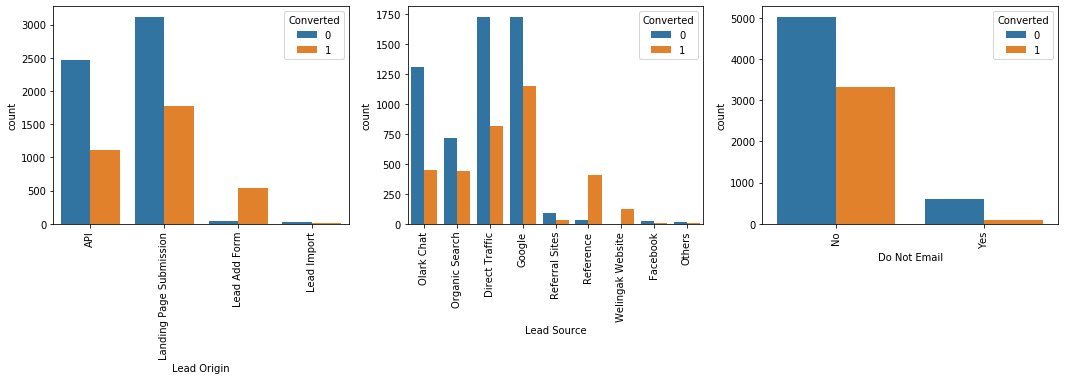

In [231]:
### Segmented univariate analysis of 'Lead Origin', 'Lead Source', 'Do Not Email'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='Lead Origin',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Lead Source',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Do Not Email',hue = 'Converted',data = df)
plt.xticks(rotation = 90)


Insights:
- Most origins of the lead which are converted come from landing page submission
- We can see that some of the other origins of the lead which are converted come from API,Lead add form
- Most Sources of the lead which are converted are from Google
- We can see that some of the sources of the lead which are converted come from Direct traffic,Reference,Olark Chat
- Most of the converted opted for no in do not email column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

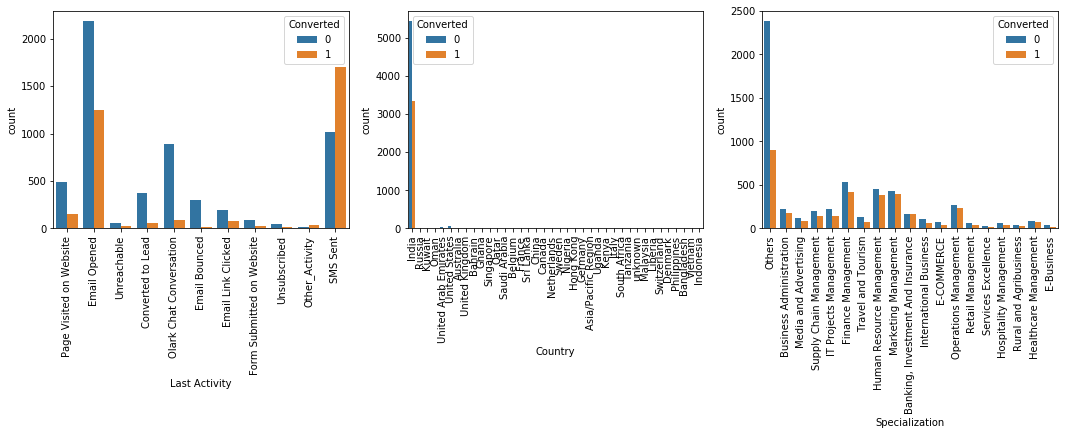

In [232]:
# segmented univariate analysis of 'Last Activity', 'Country', 'Specialisation'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='Last Activity',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Country',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Specialization',hue = 'Converted',data = df)
plt.xticks(rotation = 90)

Insights:
- Most of the customers who are converted has last activity as SMS sent and most of the customers who are not converted opened their emails as their last activity
- Most of the customers who are converted are from india
- MOst of the customers who are converted belong to others,finance management,human resource management specialization categories

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

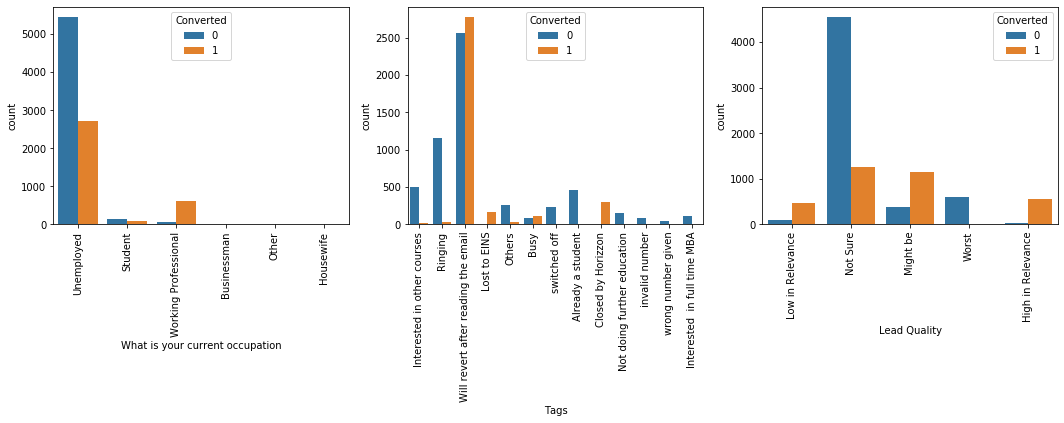

In [233]:
# segmented univariate analysis of 'What is your current occupation', 'Tags', 'Lead Quality'
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='What is your current occupation',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='Tags',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Lead Quality',hue = 'Converted',data = df)
plt.xticks(rotation = 90)


Insights:
- Most of the customers who are converted are unemployed
- Most of the customers who are converted got 'Will revert after reading the email' tagged.
- Most of the customers who are converted has lead quality has might be or not sure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

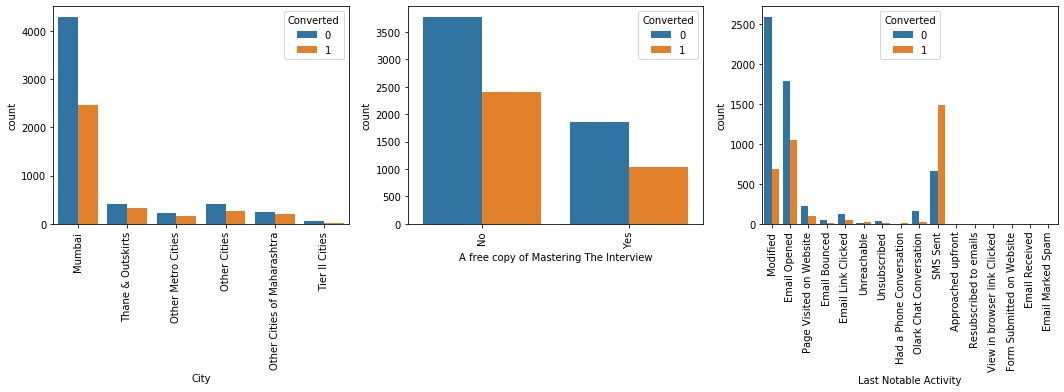

In [234]:
#segemented univariate analysis of 'City','A free copy of Mastering The Interview', 'Last Notable Activity'

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.countplot(x ='City',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 2)
sns.countplot(x ='A free copy of Mastering The Interview',hue = 'Converted',data = df)
plt.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x ='Last Notable Activity',hue = 'Converted',data = df)
plt.xticks(rotation = 90)


Insights:
- Most of the converted customers last activity is SMS sent
- Some of the other converted customers last activities belong to Modified,email opened categories
- Most of the customers who are converted dont want a free copy of mastering the interview
- Most of the customers who got converted live in mumbai

# CREATING DUMMY VARIABLES 

In [235]:
# before creating dummy variables for columns ,there are some columns who has only two categories therefore mapping those column value sto 0 and 1
dic = {'No':0,'Yes':1}
df['Do Not Email'] = df['Do Not Email'].map(dic)
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map(dic)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


In [236]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [237]:
# creating dummy variables
categorical_columns = ['Lead Origin', 'Lead Source','Last Activity', 'Country','Specialization',
                       'What is your current occupation','Tags','Lead Quality','City',
                       'Last Notable Activity']
df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True)
list(df.columns)

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Others',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other_Activity',
 'Last Activity_Page Visited on Website',
 'Last Activity_SMS Sent',
 'Last Activity_Unreachable',
 'Last Activity_Unsubscribed',
 'Country_Australia',
 'Country_Bahrain',
 'Country_Bangladesh',
 'Country_Belgium',
 'Country_Canada',
 'Country_China',
 'Country_Denmark',
 'Country_France',
 'Country_Germany',
 'Coun

# OUTLIER HANDLING

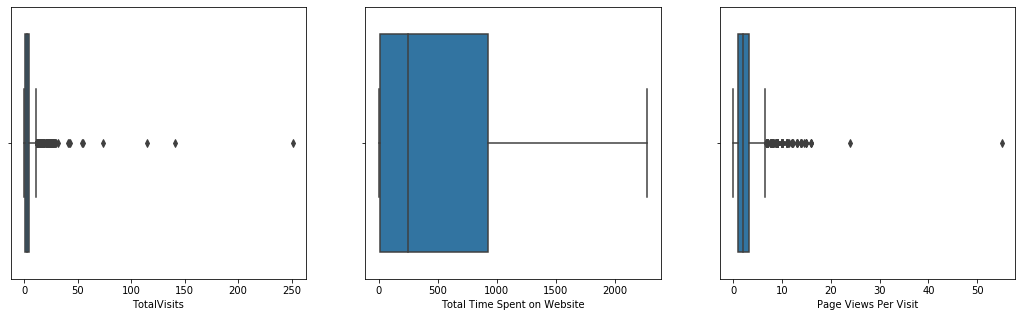

In [238]:
numeric_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(df.TotalVisits)
plt.subplot(1, 3, 2)
sns.boxplot(df['Total Time Spent on Website'])
plt.subplot(1, 3, 3)
sns.boxplot(df['Page Views Per Visit'])

In [239]:
df[numeric_columns].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [240]:
# there are lot of outliers in page views per visit and total visits columns, and these may affect our analysis ,therefore removing them for better analysis

#handling outliers in page views per visit and we will use IQR capping method
Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3-Q1
df = df[(df['Page Views Per Visit']>= Q1-1.5*IQR) & (df['Page Views Per Visit']<= Q3+1.5*IQR)] 

#handling outliers in total visits and we will use IQR capping method
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3-Q1
df = df[(df['TotalVisits']>= Q1-1.5*IQR) & (df['TotalVisits']<= Q3+1.5*IQR)] 

df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Train- test split

In [241]:
# capturing independent variables in X
X = df.drop(['Converted'],axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [242]:
# Putting target variable converted in y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [243]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# FEATURE SCALING

In [244]:
# Scaling is done so that algorithm would not be biased
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5792,0,-1.237208,-0.861871,-1.237696,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8192,0,-0.277995,0.811804,-0.024037,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2843,0,2.599643,-0.416295,-0.266769,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8964,0,0.681217,-0.512038,1.189621,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8457,0,0.201611,-0.600417,-0.327452,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# RUNNING FIRST TRAINING MODEL

In [245]:
# Logistic regression model
# 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Converted' and 'Not converted').
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5648
Model Family:                Binomial   Df Model:                          115
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.0
Date:                Sun, 31 Jan 2021   Deviance:                       2296.0
Time:                        19:38:32   Pearson chi2:                 5.30e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.5164   4.23e+05   4.86e-05      1.000   -8.28e+05    8.28e+05
Do Not Email                                            -0.8887      0.328     -2.708      0.007      -1.532      -0.245
TotalVisits                                              0.1256      0.106      1.184      0.237      -0.082       0.334
Total Time Spent on Website                              1.0440      0.066     15.886      0.000       0.915       1.173
Page Views Per Visit                                    -0.3508      0.107     -3.278      0.001      -0.561      -0.141
A free copy of Mastering The Interview                  -0.1631      0.197     -0.826      0.409      -0.550       0.224
Lead Origin_Landing Page Submission                     -0.8324      0.246     -3.390      0.001      -1.314      -0.351
Lead Origin_Lead Add Form                               24.1262   2.05e+05      0.000      1.000   -4.01e+05    4.01e+05
Lead Origin_Lead Import                                 30.3309   3.57e+05   8.49e-05      1.000      -7e+05       7e+05
Lead Source_Facebook                                   -30.5890   3.57e+05  -8.56e-05      1.000      -7e+05       7e+05
Lead Source_Google                                       0.1969      0.203      0.968      0.333      -0.202       0.596
Lead Source_Olark Chat                                   0.7167      0.269      2.660      0.008       0.189       1.245
Lead Source_Organic Search                               0.4583      0.240      1.906      0.057      -0.013       0.930
Lead Source_Others                                      -0.2785      1.324     -0.210      0.833      -2.873       2.316
Lead Source_Reference                                  -22.9765   2.05e+05     -0.000      1.000   -4.01e+05    4.01e+05
Lead Source_Referral Sites                               0.0029      0.515      0.006      0.996      -1.006       1.012
Lead Source_Welingak Website                             3.0787   2.07e+05   1.49e-05      1.000   -4.06e+05    4.06e+05
Last Activity_Email Bounced                             -0.6412      0.745     -0.860      0.390      -2.102       0.820
Last Activity_Email Link Clicked                         0.9474      0.584      1.623      0.105      -0.197       2.091
Last Activity_Email Opened                               0.2161      0.400      0.540      0.589      -0.568       1.000
Last Activity_Form Submitted on Website                  0.5924      0.601      0.986      0.324      -0.585       1.770
Last Activity_Olark Chat Conversation                   -0.4374      0.407     -1.075      0.282      -1.235       0.360
Last Activity_Other_Activity                             1

Insights:<br>
In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

# FEATURE SELECTION USING RFE

In [246]:
# fitting data to rfe
logreg = LogisticRegression()  
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [247]:
# checking variables support
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False])

In [248]:
# checking the rank of variables along with support
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 66),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 43),
 ('A free copy of Mastering The Interview', False, 64),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 56),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 82),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 50),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Form Submitted on Website', False, 51),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 20),
 ('Last Activity_Page Visited on Website', False, 76),


In [249]:
# checking columns which are not in support and storing columns in col which are in support
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=107)

# Model 0 (with all variables selected by RFE)

In [250]:
X_train_sm = sm.add_constant(X_train[col])
log_model_0 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_model_0 = log_model_0.fit()
res_model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5748
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.1
Date:                Sun, 31 Jan 2021   Deviance:                       2800.1
Time:                        19:38:52   Pearson chi2:                 3.44e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9303      0.238     -8.103      0.000      -2.397      -1.463
Do Not Email                                -1.3451      0.238     -5.662      0.000      -1.811      -0.880
Lead Origin_Lead Add Form                    1.1614      0.401      2.897      0.004       0.376       1.947
Lead Source_Welingak Website                23.4804   1.13e+04      0.002      0.998   -2.22e+04    2.23e+04
Last Activity_Olark Chat Conversation       -1.4203      0.198     -7.182      0.000      -1.808      -1.033
Tags_Busy                                    4.2817      0.358     11.970      0.000       3.581       4.983
Tags_Closed by Horizzon                      8.4996      1.059      8.026      0.000       6.424      10.575
Tags_Lost to EINS                            9.2780      0.764     12.141      0.000       7.780      10.776
Tags_Ringing                                -1.4161      0.348     -4.067      0.000      -2.099      -0.734
Tags_Will revert after reading the email     4.0742      0.257     15.827      0.000       3.570       4.579
Tags_invalid number                         -1.7229      1.145     -1.505      0.132      -3.967       0.521
Tags_switched off                           -2.9230      0.780     -3.746      0.000      -4.452      -1.394
Lead Quality_Not Sure                       -3.4670      0.136    -25.555      0.000      -3.733      -3.201
Lead Quality_Worst                          -3.0862      0.709     -4.351      0.000      -4.476      -1.696
Last Notable Activity_SMS Sent               2.5907      0.126     20.603      0.000       2.344       2.837
Last Notable Activity_Unsubscribed           1.8887      0.590      3.199      0.001       0.731       3.046
============================================================================================================
"""

In [251]:
# Getting the predicted values on the train set
y_train_pred = res_model_0.predict(X_train_sm)
y_train_pred[:10]

5792    0.997257
8192    0.001093
2843    0.034015
8964    0.014448
8457    0.060465
6916    0.003238
4172    0.319589
3838    0.979782
7942    0.210313
7531    0.210313
dtype: float64

In [252]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99725732, 0.00109323, 0.03401495, 0.01444799, 0.06046494,
       0.00323799, 0.31958882, 0.97978176, 0.2103129 , 0.2103129 ])

In [253]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.997257,5792
1,0,0.001093,8192
2,0,0.034015,2843
3,0,0.014448,8964
4,0,0.060465,8457


In [254]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.997257,5792,1
1,0,0.001093,8192,0
2,0,0.034015,2843,0
3,0,0.014448,8964,0
4,0,0.060465,8457,0


Here, you use the GLM (Generalized Linear Models) method of the library statsmodels. 

Now, recall that the logistic regression curve gives you the probabilities of converted and not converted. You can get these probabilities by simply using the 'predict' function as shown in the notebook.

Since the logistic curve gives you just the probabilities and not the actual classification of converted and not converted, you need to find a threshold probability to classify customers as converted and not converted. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Non-converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.

In [255]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3453  134]
 [ 326 1851]]


In [256]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9201943095072866


So using the confusion matrix, we got an accuracy of about 92.0 % which seems to be a good number to begin with.

This accuracy is based on features selected from RFE. But as at the beginning we saw high p values therefore there is  some multicollinearity among the features. So we definitely need to check the VIFs as well to further eliminate the redundant variables.

So what we r doing from now is we chack VIF,p values for model and we check if the dropping of variable which has high VIF or high p value decreases the accuracy by a lot. If dropping the variable decreases accuracy by a lot we keep it

### Checking VIFs

In [257]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,2.96
8,Tags_Will revert after reading the email,2.77
1,Lead Origin_Lead Add Form,1.63
7,Tags_Ringing,1.56
13,Last Notable Activity_SMS Sent,1.55
2,Lead Source_Welingak Website,1.35
3,Last Activity_Olark Chat Conversation,1.22
0,Do Not Email,1.19
5,Tags_Closed by Horizzon,1.16
10,Tags_switched off,1.12


All VIFs for this model are below 5, but Lead Source_Welingak Website column has high p value therefore presense of this variable is not bringing anything to explain the variability of the target. So dropping this and recreating the model

In [258]:
col = col.drop('Lead Source_Welingak Website',1)
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

# MODEL 1

In [259]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log_model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_model_1 = log_model_1.fit()
res_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5749
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.5
Date:                Sun, 31 Jan 2021   Deviance:                       2829.0
Time:                        19:39:05   Pearson chi2:                 4.18e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0481      0.245     -8.360      0.000      -2.528      -1.568
Do Not Email                                -1.3172      0.232     -5.673      0.000      -1.772      -0.862
Lead Origin_Lead Add Form                    2.6859      0.329      8.160      0.000       2.041       3.331
Last Activity_Olark Chat Conversation       -1.4270      0.197     -7.252      0.000      -1.813      -1.041
Tags_Busy                                    4.3563      0.363     12.005      0.000       3.645       5.068
Tags_Closed by Horizzon                      8.5120      1.063      8.009      0.000       6.429      10.595
Tags_Lost to EINS                            9.3442      0.767     12.186      0.000       7.841      10.847
Tags_Ringing                                -1.3618      0.353     -3.862      0.000      -2.053      -0.671
Tags_Will revert after reading the email     4.1603      0.265     15.700      0.000       3.641       4.680
Tags_invalid number                         -1.6103      1.143     -1.409      0.159      -3.850       0.629
Tags_switched off                           -2.7983      0.782     -3.580      0.000      -4.331      -1.266
Lead Quality_Not Sure                       -3.4171      0.135    -25.354      0.000      -3.681      -3.153
Lead Quality_Worst                          -2.9812      0.713     -4.183      0.000      -4.378      -1.584
Last Notable Activity_SMS Sent               2.5777      0.125     20.555      0.000       2.332       2.823
Last Notable Activity_Unsubscribed           1.8558      0.588      3.158      0.002       0.704       3.008
============================================================================================================
"""

In [260]:
#  predictionsof the training set
y_train_pred = res_model_1.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.99937417, 0.00101451, 0.03198482, 0.01407152, 0.06110947,
       0.00338199, 0.30316241, 0.97974467, 0.21332728, 0.21332728])

In [261]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.999374,5792,1
1,0,0.001015,8192,0
2,0,0.031985,2843,0
3,0,0.014072,8964,0
4,0,0.061109,8457,0


In [262]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9198473282442748


Accuracy did not drop by a lot , so dropping 'Lead Source_Welingak Website' is right step

### checking VIFs

In [263]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Quality_Not Sure,2.87
7,Tags_Will revert after reading the email,2.74
12,Last Notable Activity_SMS Sent,1.55
6,Tags_Ringing,1.54
1,Lead Origin_Lead Add Form,1.26
2,Last Activity_Olark Chat Conversation,1.22
0,Do Not Email,1.19
4,Tags_Closed by Horizzon,1.15
9,Tags_switched off,1.12
3,Tags_Busy,1.10


All VIFs of this model is below 5,but p value of tags invalid number is high

In reality too if current status of customers shows invalid number it means that customer being converted is very very low
Therefore even in business aspect too it is better to drop this column . So dropping this column and recreating the model

In [264]:
col = col.drop('Tags_invalid number',1)
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

# MODEL 2

In [265]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
log_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_model_2 = log_model_2.fit()
res_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5764
Model:                            GLM   Df Residuals:                     5750
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.8
Date:                Sun, 31 Jan 2021   Deviance:                       2831.6
Time:                        19:39:16   Pearson chi2:                 4.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.1402      0.243     -8.799      0.000      -2.617      -1.663
Do Not Email                                -1.3132      0.232     -5.663      0.000      -1.768      -0.859
Lead Origin_Lead Add Form                    2.6976      0.329      8.188      0.000       2.052       3.343
Last Activity_Olark Chat Conversation       -1.4289      0.197     -7.260      0.000      -1.815      -1.043
Tags_Busy                                    4.4556      0.360     12.364      0.000       3.749       5.162
Tags_Closed by Horizzon                      8.6029      1.062      8.097      0.000       6.520      10.685
Tags_Lost to EINS                            9.4386      0.766     12.322      0.000       7.937      10.940
Tags_Ringing                                -1.2547      0.349     -3.594      0.000      -1.939      -0.570
Tags_Will revert after reading the email     4.2550      0.263     16.189      0.000       3.740       4.770
Tags_switched off                           -2.6889      0.780     -3.447      0.001      -4.218      -1.160
Lead Quality_Not Sure                       -3.4164      0.135    -25.356      0.000      -3.680      -3.152
Lead Quality_Worst                          -3.0394      0.714     -4.258      0.000      -4.438      -1.640
Last Notable Activity_SMS Sent               2.5593      0.124     20.584      0.000       2.316       2.803
Last Notable Activity_Unsubscribed           1.8478      0.587      3.147      0.002       0.697       2.998
============================================================================================================
"""

In [266]:
#  predictionsof the training set
y_train_pred = res_model_2.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([9.99371582e-01, 9.24415527e-04, 3.24563064e-02, 1.40369575e-02,
       6.11999065e-02, 3.38128433e-03, 3.02473410e-01, 9.79807815e-01,
       2.13900230e-01, 2.13900230e-01])

In [267]:
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.999372,5792,1
1,0,0.000924,8192,0
2,0,0.032456,2843,0
3,0,0.014037,8964,0
4,0,0.061200,8457,0


In [268]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193268563497571


Accuracy did not drop by a lot therefore our choice of dropping 'Tags_invalid number' is correct

### checking VIFs

In [269]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.83
7,Tags_Will revert after reading the email,2.70
6,Tags_Ringing,1.53
11,Last Notable Activity_SMS Sent,1.53
1,Lead Origin_Lead Add Form,1.26
2,Last Activity_Olark Chat Conversation,1.22
0,Do Not Email,1.19
4,Tags_Closed by Horizzon,1.15
8,Tags_switched off,1.11
3,Tags_Busy,1.10


Now model 2 has all VIFs less than 5 and all p values are less than 0.05(significance level)

MODEL 2 is our final model

In [270]:
# let us look at confusion matrix of the final model
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3445  142]
 [ 323 1854]]


In [271]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9193268563497571

So we created 3 different models and arrived at the final model by removing coefficients with high p value 

# METRICS BEYOND SIMPLE ACCURACY

In [272]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8516306844281121

In [274]:
# Let us calculate specificity
TN / float(TN+FP)

0.9604126010593811

In [275]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.039587398940618905


In [276]:
# positive predictive value 
print (TP / float(TP+FP))

0.9288577154308617


In [277]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9142781316348195


since according to the business objective we need to find the leads who are correctly predicted as converted ,therefore sensitivty should be higher.

at the start,for predicting leads as converted we checked whether their converted probability is greater than 0.5. We took this 0.5 at random.

now we have to find the perfect cut off to increase sensitivity.

The good model is the one in which True Positive Rate (TPR) is high and False Positive rate (FPR) is low.In other words for our business model we want more no of leads to be correctly classified as converted(high TPR) and we want leads which are incorrecly classified as converted to be as less as possible (low FPR)

So you can clearly see that there is a tradeoff between the True Positive Rate and the False Positive Rate, or simply, a tradeoff between sensitivity and specificity. When you plot the true positive rate against the false positive rate, you get a graph which shows the trade-off between them and this curve is known as the ROC curve. 

The more close the graph is to the top left corner(i.e TPR = 1 adnd FPR = 0) the more accurate the graph is ,therefore if the area under the graph is more then the graph will be more close to the top left corner

# PLOTTING THE ROC CURVE

In [278]:
# function for calculating ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [279]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

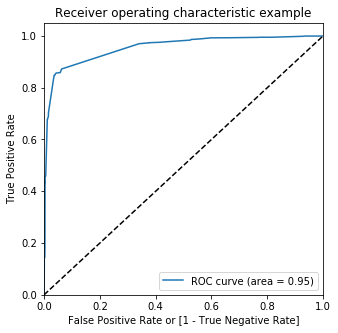

In [280]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

For a good model must be close to upper left corner of the graph

Let us find optimal threshold 

# FINDING OPTIMAL CUT OFF POINT

In [281]:
# we need to find a cut off which balances both specificity and sensitivity
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999372,5792,1,1,1,1,1,1,1,1,1,1,1
1,0,0.000924,8192,0,1,0,0,0,0,0,0,0,0,0
2,0,0.032456,2843,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014037,8964,0,1,0,0,0,0,0,0,0,0,0
4,0,0.061200,8457,0,1,0,0,0,0,0,0,0,0,0


In [282]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377689  1.000000  0.000000
0.1   0.1  0.759368  0.972898  0.629774
0.2   0.2  0.776544  0.970142  0.659047
0.3   0.3  0.910479  0.858521  0.942013
0.4   0.4  0.919327  0.854846  0.958461
0.5   0.5  0.919327  0.851631  0.960413
0.6   0.6  0.918633  0.849334  0.960691
0.7   0.7  0.916898  0.836472  0.965710
0.8   0.8  0.878036  0.702802  0.984388
0.9   0.9  0.791811  0.458429  0.994146


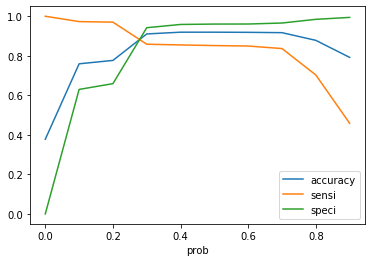

In [283]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Here according to business context we can see that from 0.3 we can see accuracy is pretty same after 0.3. Also specifity and sensitivty are high enough therefore this is our otpimal cutoff probability

In [284]:
# final predictions using the threshold 0.3
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.999372,5792,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.000924,8192,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.032456,2843,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.014037,8964,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.061200,8457,0,1,0,0,0,0,0,0,0,0,0,0


In [285]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9104788341429563

In [286]:
# confusion matrix when threshold is 0.3
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3379,  208],
       [ 308, 1869]], dtype=int64)

In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [288]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8585209003215434

In [289]:
# Let us calculate specificity
TN / float(TN+FP)

0.9420128240869807

In [290]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.05798717591301924


In [291]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8998555609051516


In [292]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9164632492541361


# Precision and Recall

In [293]:
# Precision 
print(TP/float(TP+FP))

0.8998555609051516


In [294]:
# Recall
print(TP/float(TP+FN))

0.8585209003215434


In [295]:
# precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8998555609051516

In [296]:
# recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8585209003215434

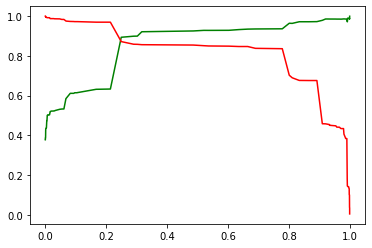

In [297]:
# precision vs recall trade off
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

So we saw two views ,precision-recall view and Sensitivity-Specificity view ,based on our business problem we need to decide on which view we should depend on ,since based on sensitvity-specificty view, we got 0.3 as optimal threshold,and based on precision-recall view,we got optimal threshold as close to 0.3,therefore going with 0.3 as optimal threshold

# MAKING THE PREDICTIONS ON TEST SET

In [298]:
# scaling the test data
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [299]:
X_test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7509,0,-1.237208,-0.861871,-1.237696,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2465,0,0.201611,-0.747715,0.582792,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,0,-1.237208,-0.861871,-1.237696,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1409,0,-0.277995,-0.858189,-0.024037,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
785,0,0.201611,0.458288,-0.327452,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,0,0.201611,-0.416295,-0.327452,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6376,0,-1.237208,-0.861871,-1.237696,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3506,0,-1.237208,-0.861871,-1.237696,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6775,0,0.681217,-0.066461,1.189621,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [300]:
X_test = X_test[col]

In [301]:
# adding constant to fit into model
X_test_sm = sm.add_constant(X_test)

In [302]:
# making predictions
y_test_pred = res_model_2.predict(X_test_sm)

In [303]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [304]:
# Let's see the head
y_pred_1.head()

,0
7509,0.213900
2465,0.213900
2132,0.999895
1409,0.105254
785,0.892334


In [305]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [306]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [307]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [308]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [309]:
y_pred_final.head()

,Converted,CustID,0
0,0,7509,0.213900
1,0,2465,0.213900
2,1,2132,0.999895
3,0,1409,0.105254
4,1,785,0.892334


In [310]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [311]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [312]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,7509,0,0.213900
1,2465,0,0.213900
2,2132,1,0.999895
3,1409,0,0.105254
4,785,1,0.892334


In [313]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [314]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,7509,0,0.213900,0
1,2465,0,0.213900,0
2,2132,1,0.999895,1
3,1409,0,0.105254,0
4,785,1,0.892334,1


In [315]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9089437474706596

In [316]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1488,   96],
       [ 129,  758]], dtype=int64)

In [317]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [318]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.85456595264938

In [319]:
# Let us calculate specificity
TN / float(TN+FP)

0.9393939393939394

Accuracy of training set is 91.04%,accuracy of test is 90.8%  ,and sensitivty ,specificity measures are also very close to each other for both training and test set
 
Therefore model is stable and can be able to generalize

# FINAL MODEL SUMMARY

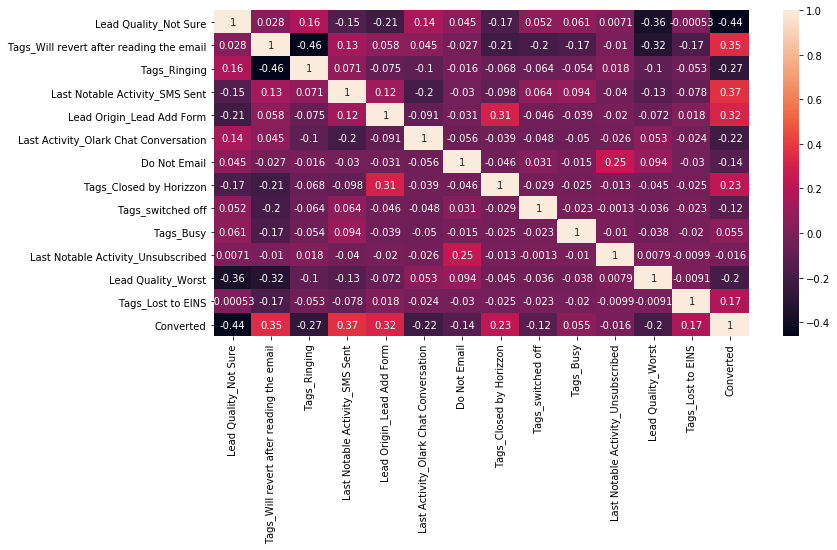

In [320]:
# plotting heat map on final columns
# analysis of final model columns with converted variable
plt.figure(figsize = (12,6))
final_columns = ['Lead Quality_Not Sure','Tags_Will revert after reading the email','Tags_Ringing','Last Notable Activity_SMS Sent',
'Lead Origin_Lead Add Form','Last Activity_Olark Chat Conversation','Do Not Email','Tags_Closed by Horizzon',
'Tags_switched off','Tags_Busy','Last Notable Activity_Unsubscribed','Lead Quality_Worst','Tags_Lost to EINS','Converted']
sns.heatmap(df[final_columns].corr(),annot = True)

Final Model summary:
- Test accuracy is 90.8 %, training accuracy is 91.0 %
- Sensitivity for test set is 85.4 %, Sensitivity for training set is 85.8 %
- Specificity for test set is 93.9 %, Specificity for training set is 94.2 %
- Top three variables in model,that contribute to lead conversion are :
    - Last Notable Activity_SMS Sent
    - Tags_Will revert after reading the email
    - Lead Origin_Lead Add Form
- Top three variables in model that should be focused are:
    - Lead Quality_Not Sure (negatively impacting to conversion)
    - Last Notable Activity_SMS Sent (positively impacting to conversion)
    - Tags_Will revert after reading the email (positively impacting to conversion)
- Therefore company should focus on sending more SMS,since this helps in higher conversion. 
- Company should focus on lead add form since customer indentification by that produces more conversion
- Also company should focus on the customers whose current status is 'Will revert after readin the email' ,so customers who are tagged by this type must be monitored since there is a high potential for these type of customers for lead conversion